In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Expansión libre

In [2]:
#Load the simulation
from pythonmd.simcore import MDSimulationSession

In [3]:
%%file free_expansion
[MD Simulation]
number_of_molecules:400
box_width: 600
box_height: 300
wall: fixed
wall_pos: 100

Overwriting free_expansion


In [4]:
#Use diffusion set-up
session = MDSimulationSession('free_expansion')
#heat up the gas until T=4
session.run_until_t(4)
#Wait some time (not until equilibrium)
session.run(100)
#Cool the gas until T=0.5
session.run_until_t(0.5)
#Wait until gas equilibrium
session.run_until_equilibrium(delta_t=1e-05)
current_time, average_T, average_P, volume, number_of_molecules = session.get_left_stats()
_, _, _, total_energy, kinetic, potential,_, _ = session.get_stats()
print("PV / NT = %.4f" % ((average_P*volume)/(number_of_molecules*average_T)))
print("T = %.4f" % average_T)
print("Volume: %i" % volume)
print("kinetic vs potential: %.4f, %.4f" % (kinetic, potential))

PV / NT = 0.9402
T = 0.5022
Volume: 30000
kinetic vs potential: 199.3962, -32.4395


In [5]:
#remove the wall
session.remove_wall()
session.run_until_equilibrium(delta_t=1e-05)
current_time, average_T, average_P, volume, number_of_molecules = session.get_left_stats()
_, _, _, total_energy, kinetic, potential,_, _ = session.get_stats()
print("T = %.4f" % average_T)
print("PV / NT = %.4f" % ((average_P*volume)/(number_of_molecules*average_T)))
print("Volume: %i" % volume)
print("kinetic vs potential: %.4f, %.4f" % (kinetic, potential))

T = 0.4419
PV / NT = 0.9791
Volume: 180000
kinetic vs potential: 176.5879, -9.6146


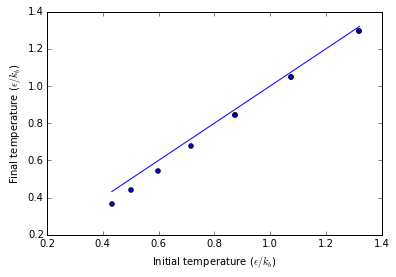

In [6]:
initial_t = []
final_t = []
for t in linspace(1.5, .4, 10):
    session = MDSimulationSession('free_expansion')
    session.run_until_t(4)
    session.run(100)
    session.run_until_t(t)
    session.run_until_equilibrium(delta_t=1e-05)
    _, original_T, _, _, _ = session.get_left_stats()
    initial_t.append(original_T)
    session.remove_wall()
    session.run_until_equilibrium(delta_t=1e-05)
    _, final_T, _, _, _ = session.get_left_stats()
    final_t.append(final_T)
    
plt.scatter(initial_t, final_t)
plt.plot(initial_t, initial_t)
plt.xlabel("Initial temperature ($\epsilon/k_b$)")
plt.ylabel("Final temperature ($\epsilon/k_b$)")

In [7]:
%%file free_expansion_2
[MD Simulation]
number_of_molecules:400
box_width: 600
box_height: 300
wall: effusion
wall_pos: 300
wall_hole: 0

Overwriting free_expansion_2


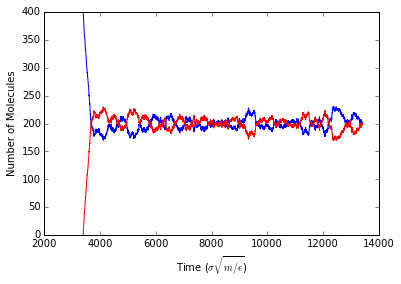

In [8]:
time = []
n_left = []
n_right = []
t_left = []
t_right = []

session = MDSimulationSession('free_expansion_2')
session.run_until_t(4)
session.run(100)
session.run_until_t(2)
session.run_until_equilibrium(delta_t=1e-05)
current_time, t_l, _, _, n_l = session.get_left_stats()
_, t_r, _, _, n_r = session.get_right_stats()

time.append(current_time)
n_left.append(n_l)
n_right.append(n_r)
t_left.append(t_l)
t_right.append(t_r)

session.change_hole(300)
session.reset_statistics()

for _ in range(10000):
    session.run(1)
    current_time, t_l, _, _, n_l = session.get_left_stats()
    _, t_r, _, _, n_r = session.get_right_stats()
    
    time.append(current_time)
    n_left.append(n_l)
    n_right.append(n_r)
    t_left.append(t_l)
    t_right.append(t_r)


plt.plot(time, n_left, label='left')
plt.plot(time, n_right, color='red', label='right')
plt.xlabel("Time ($\sigma\sqrt{m/\epsilon}$)")
plt.ylabel("Number of Molecules")

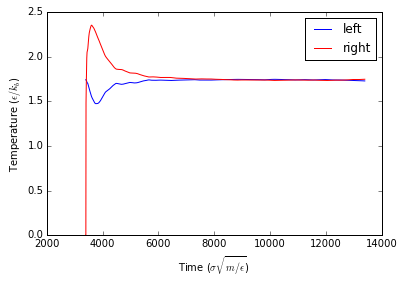

In [9]:
plt.plot(time, t_left, label='left')
plt.plot(time, t_right, color='red', label='right')
plt.xlabel("Time ($\sigma\sqrt{m/\epsilon}$)")
plt.ylabel("Temperature ($\epsilon/k_b$)")
plt.legend(loc='best')

In [14]:
average_n_left = (sum(n_left[4000:])/len(n_left[4000:]))
average_t_left = (sum(t_left[4000:])/len(t_left[4000:]))
average_n_right = (sum(n_right[4000:])/len(n_right[4000:]))
average_t_right = (sum(t_right[4000:])/len(t_right[4000:]))

print("Initial time of equilibrium: %i" % time[4000])
print("Average n left: %.4f" % average_n_left)
print("Average T left: %.4f" % average_t_left)
print("Average n right: %.4f" % average_n_right)
print("Average T right: %.4f" % average_t_right)
print((average_t_left)/(average_t_right))

Initial time of equilibrium: 7397
Average n left: 201.1473
Average T left: 1.7396
Average n right: 198.8527
Average T right: 1.7391
1.00030769396
